<a href="https://colab.research.google.com/github/Urooj112233/Task-1-of-Data-Science-internship/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1**

In [6]:
#step 1: Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#Step 2: Data Loading
# Read the CSV file
df = pd.read_csv("/content/Airbnb.csv")

# Display the first few rows
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


In [9]:
#display last few rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [10]:
#sanity check of the data
#shape of data means rows and columns
df.shape


(48895, 16)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
#step 3: Data Cleaning
#find the missing values
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [13]:
#finding percentge of the missing value
#if the percentage of missing value exceeds 50% then we will delete that column
df.isnull().mean()*100

,0
id,0.000000
name,0.032723
host_id,0.000000
host_name,0.042949
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000
longitude,0.000000
room_type,0.000000
price,0.000000


In [22]:
#finding duplicates
df.duplicated().sum()

np.int64(0)

In [23]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [26]:
# Identify outliers using IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]
    # Apply to numeric columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers_iqr(df, col)

In [18]:
#garbage value(always in the form of object data type)
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())
  print("***"*10)


name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Private Room                                          11
                                                      ..
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Cozy Bedroom- Beautiful, Historical Location           1
Bright Room w/ a Brilliant Manhattan View              1
Name: count, Length: 47896, dtype: int64
******************************
host_name
Michael          417
David            403
Sonder (NYC)     327
John             294
Alex             279
                ... 
Pujan              1
Raheem             1
Rusaa              1
Erin At Bedly      1
Brad & Rachel      1
Name: count, Length: 11452, dtype: int64
**************

In [ ]:
#EDA
#descriptive statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.describe(include="object")

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47896,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,23/06/2019
freq,18,417,21661,3920,25409,1413


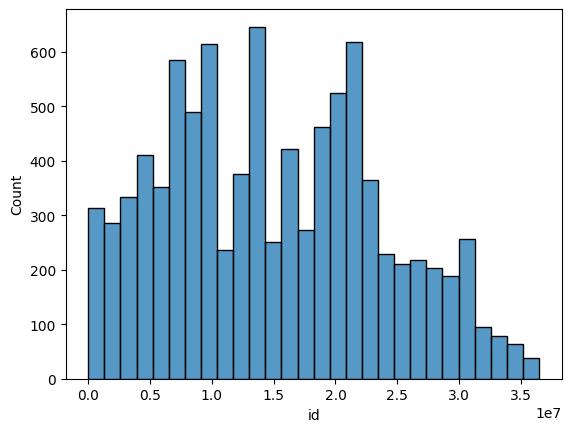

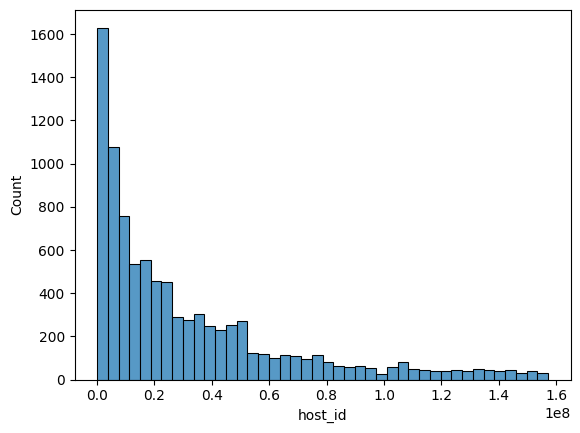

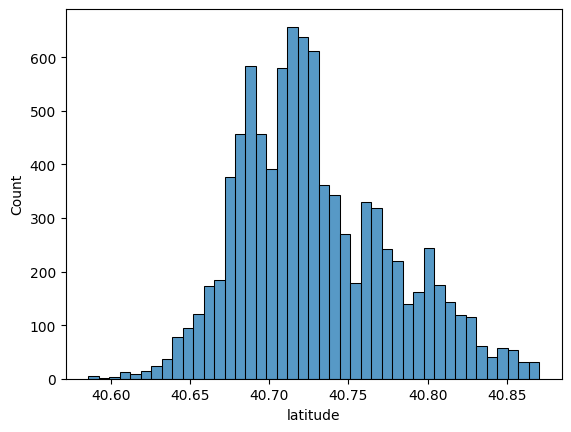

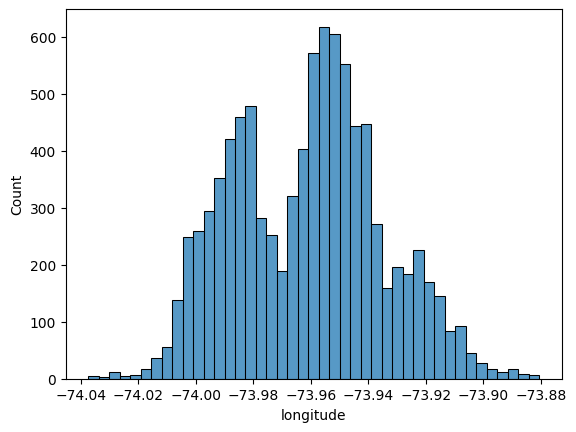

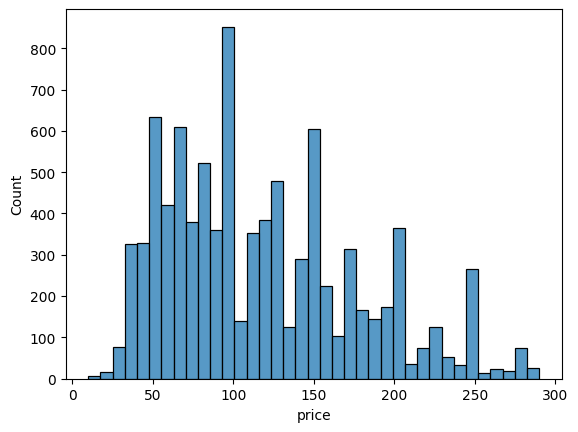

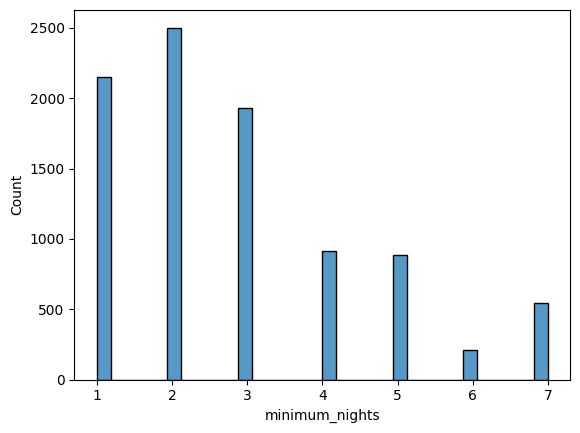

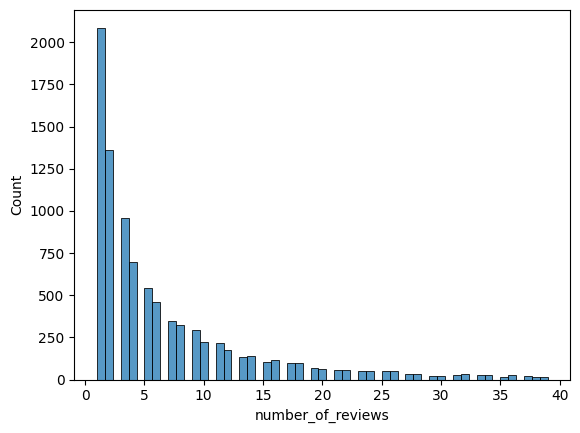

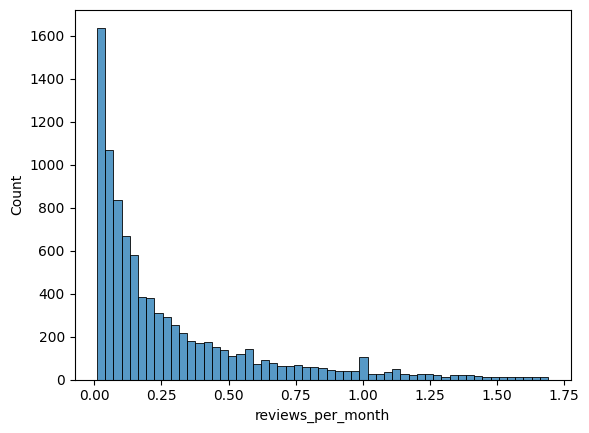

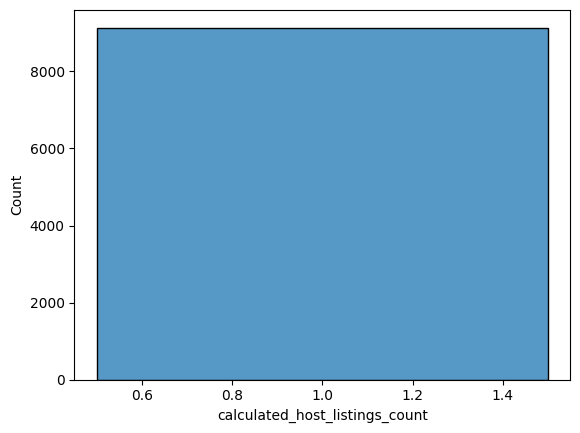

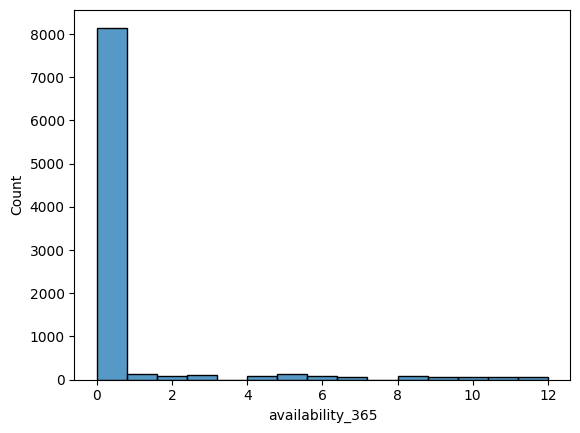

In [28]:
#STEP 4: DATA VISUALIZATION
#Histogram for numeric distribution
import warnings
warnings.filterwarnings("ignore")
for i in df.select_dtypes(include='number').columns:
  sns.histplot(data=df,x=i)
  plt.show()

In [30]:
#Correlation Heat map for numeric features
s=df.select_dtypes(include="number").corr()

<Axes: >

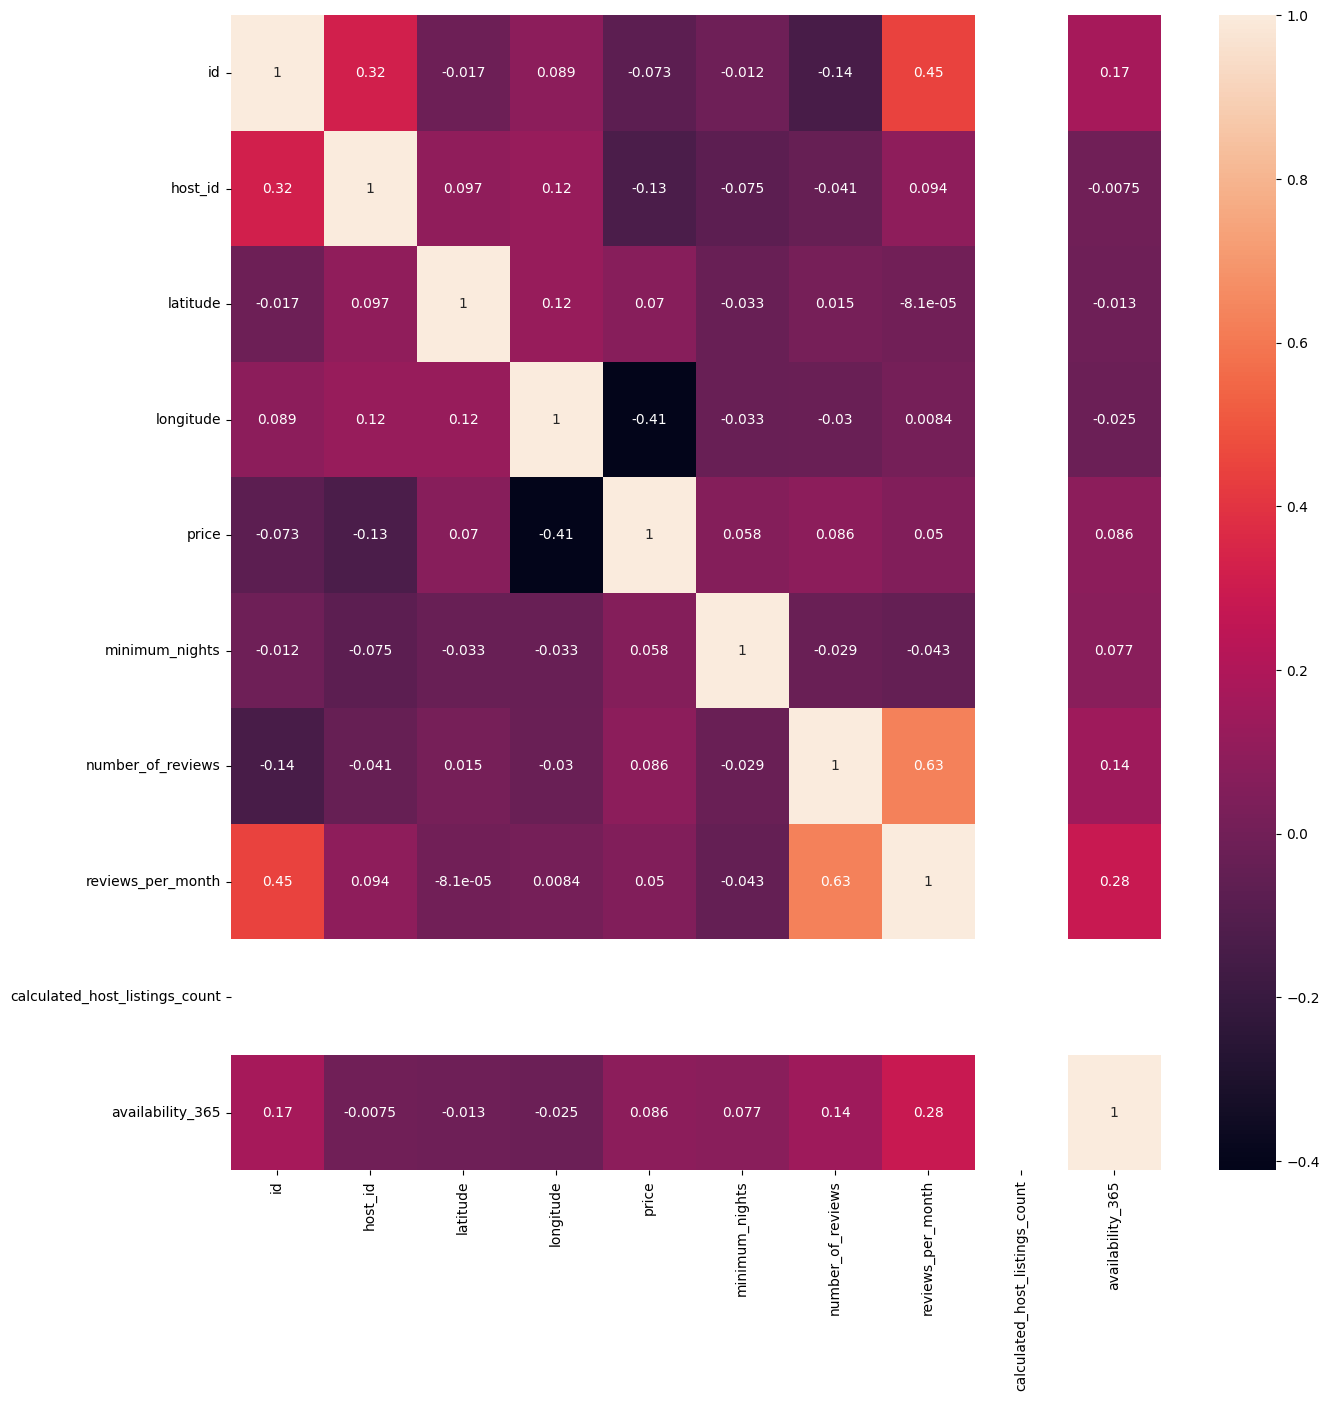

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(s,annot=True)

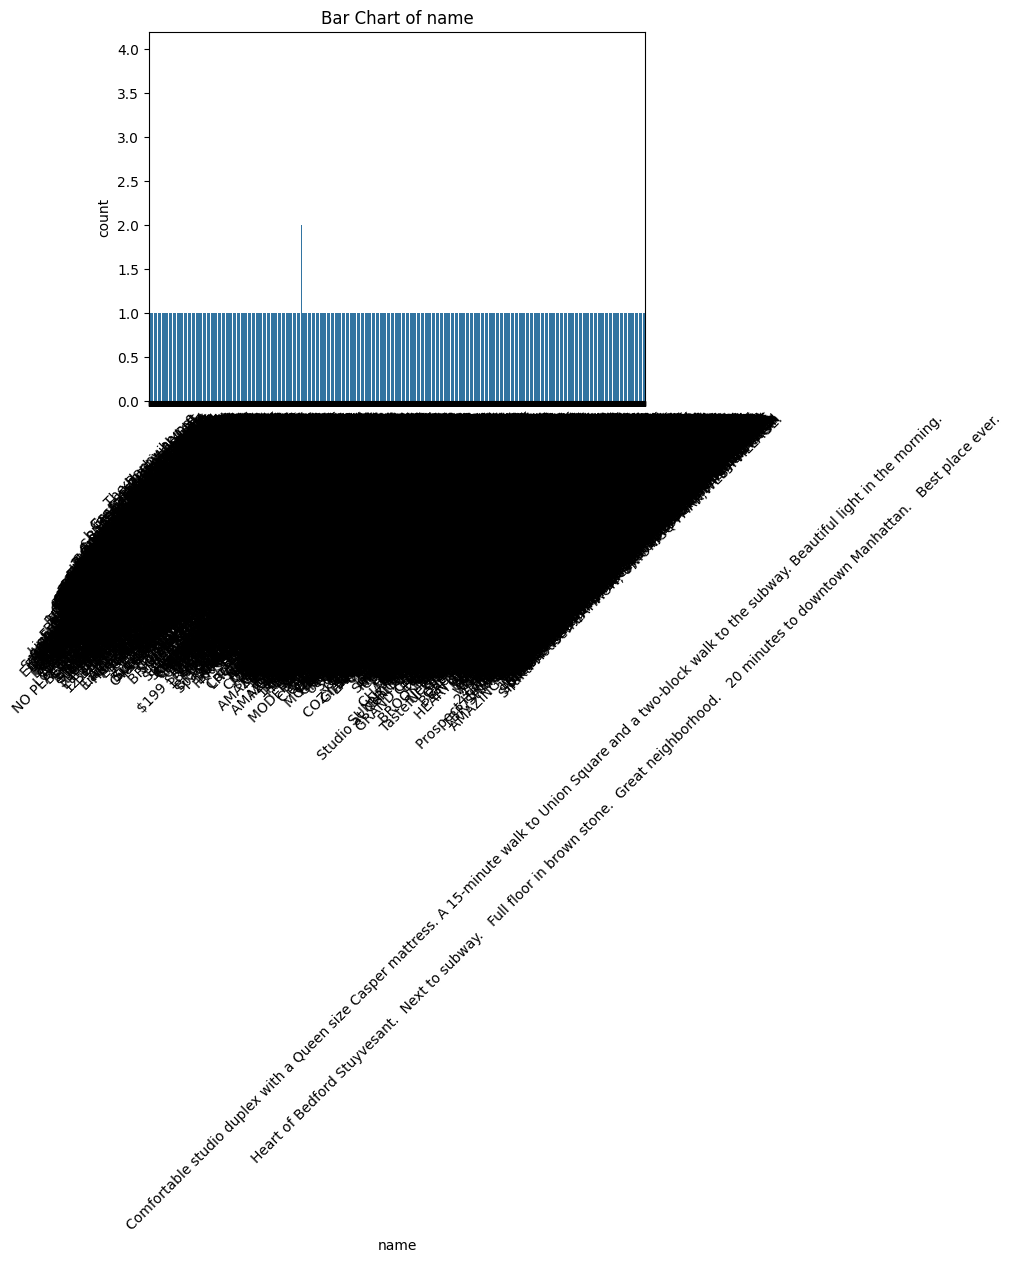

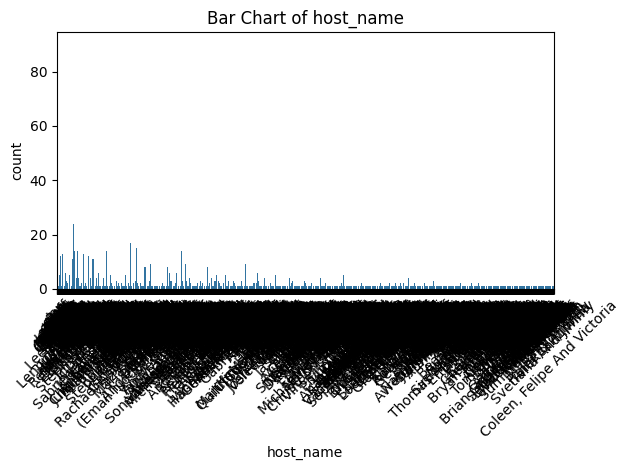

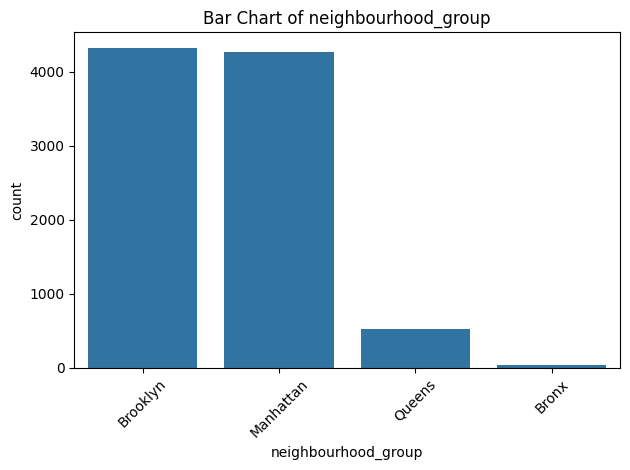

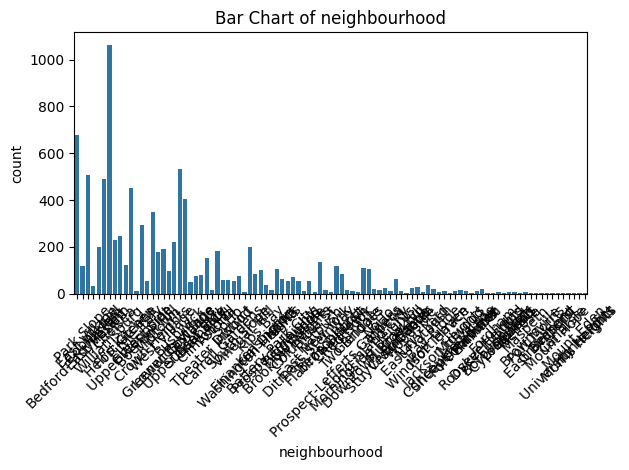

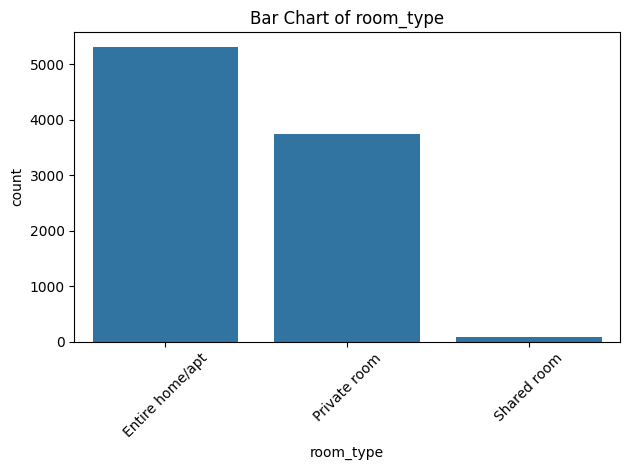

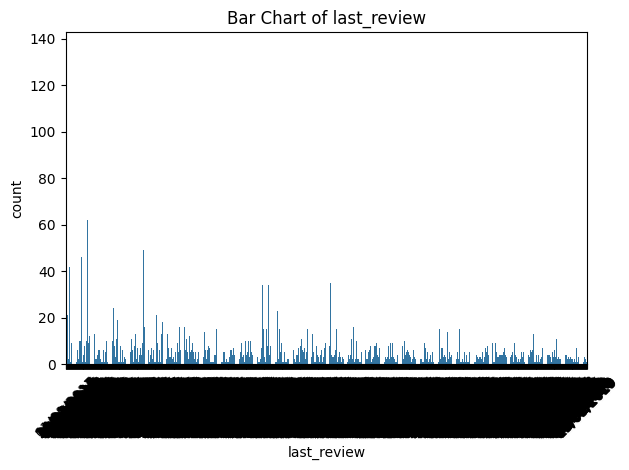

In [34]:
# Bar charts for categorical variables
# Bar charts for categorical variables
for col in df.select_dtypes(include='object').columns:
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Bar Chart of {col}')
    plt.tight_layout()
    plt.show()


**SUMMARY** **INSIGHTS**

# 📄 Airbnb Dataset Analysis Report

### ✅ 1. Data Overview
The Airbnb dataset contains multiple rows and columns with both **numerical** (e.g., price, reviews) and **categorical** (e.g., location, room type) features. It provides valuable insights into Airbnb listings.

---

### 🧹 2. Data Cleaning
- **Missing Values**: All columns were checked. No column had more than 50% missing data, so all were retained.
- **Duplicates**: Duplicate rows were identified and removed.
- **Outliers**: Outliers in numeric features were handled using the **Interquartile Range (IQR)** method.
- **Garbage Values**: Text columns were inspected for unusual or incorrect values.

---

### 🔍 3. Exploratory Data Analysis (EDA)
- **Descriptive Statistics**: Summary statistics were generated for both numeric and categorical columns to understand data distribution and central tendencies.
- **Text Columns**: Unique values and frequency counts were reviewed to detect any data issues.

---

### 📊 4. Data Visualization
- **Histograms**: Plotted for numeric features to show distribution, skewness, and spread.
- **Bar Charts**: Created for categorical features to understand the frequency of each category.
- **Correlation Heatmap**: Revealed relationships among numeric variables. Some features showed strong or weak correlations, which may guide future analysis or modeling.

---

### 📌 5. Key Insights
- The dataset is clean and ready for further analysis.
- Some numerical features are **right-skewed** and may need transformation.
- Certain categorical columns have many unique values and could be simplified or encoded.
- The correlation heatmap highlighted **important feature relationships**, helpful for modeling tasks like prediction or classification.
